## Data Understanding

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
#make sure you install seaborn with jupyter shell pip3 install seaborn
import seaborn as sns
%matplotlib inline

#Load the dataset student's maths performance
df = pd.read_csv('student-mat.csv',sep=',')
#Print the size of the dataset
df.shape

(395, 33)

In [5]:
#descriptive statistics of the dataset
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,379.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.949868,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.902741,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [6]:
#What are the columns with null values
nulls = set(df.columns[df.isnull().mean()> 0])
nulls

{'Mjob', 'famrel'}

In [7]:
#How bad are the missing values for Mjob
Mjob_missing_fract = (df.shape[0] - df['Mjob'].count())/df.shape[0]
Mjob_missing_fract

0.02278481012658228

In [8]:
#How bad are the missing values for famrel
famrel_missing_fract = (df.shape[0] - df['famrel'].count())/df.shape[0]
famrel_missing_fract

0.04050632911392405

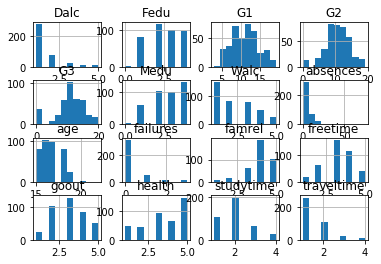

In [9]:
#Histogram
df.hist();

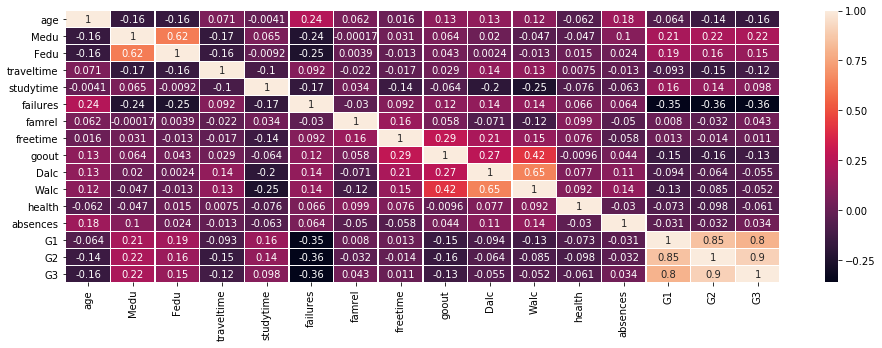

In [10]:
#Let's first look at the correlation between numerical attributes
#Correlation Matrix
plt.figure(figsize = (16,5))
ax = sns.heatmap(df.corr(), annot=True, linewidths=.5)

In [11]:
#Next we want to analyze the categorical columns
#Let's first look at the data types of each column
df.dtypes

school         object
sex            object
age             int64
address        object
famsize        object
Pstatus        object
Medu            int64
Fedu            int64
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime      int64
studytime       int64
failures        int64
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
romantic       object
famrel        float64
freetime        int64
goout           int64
Dalc            int64
Walc            int64
health          int64
absences        int64
G1              int64
G2              int64
G3              int64
dtype: object

In [12]:
#List categorical data
df.select_dtypes(include=['object'])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,NaN,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,other,no,yes,yes,no,yes,yes,no,no
391,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
392,MS,M,R,GT3,T,other,other,course,other,no,no,no,no,no,yes,no,no
393,MS,M,R,LE3,T,services,other,course,mother,no,no,no,no,no,yes,yes,no


In [13]:
#Let's write a function to plot the bar charts
def plot_bar(df, group_by_col, value_col, title):
    '''
    INPUT
    df - data frame
    group_by_col - column to be grouped by 
    value_col - value to take the mean
    title - Title of the chart
    .....
    OUTPUT
    None. Just draws the chart
    
    This function plots a bar chart based on a given grouping logic
    ....
    '''
    gk = df.groupby(group_by_col).mean()[[value_col]]
    print(gk)
    (gk/df.shape[0]).plot(kind="bar");
    plt.title(title);

                 G3
guardian           
father    10.688889
mother    10.483516
other      9.062500


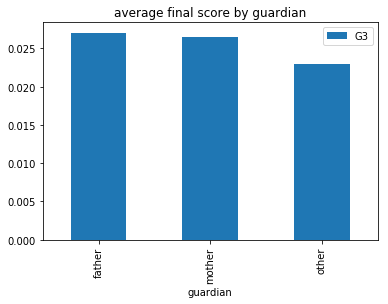

In [14]:
#Lets find the average final score by guardian
plot_bar(df,"guardian","G3","Average final score by guardian")

                G3
Pstatus           
A        11.195122
T        10.324859


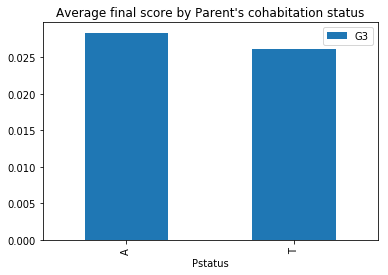

In [15]:
#Lets find the average final score by parent's cohabitation status
plot_bar(df,"Pstatus","G3","Average final score by Parent's cohabitation status")

                  G3
schoolsup           
no         10.561047
yes         9.431373


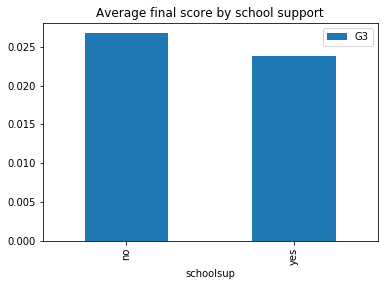

In [16]:
#Lets find the average final score by school support
plot_bar(df,"schoolsup","G3","Average final score by school support")

               G3
famsup           
no      10.640523
yes     10.272727


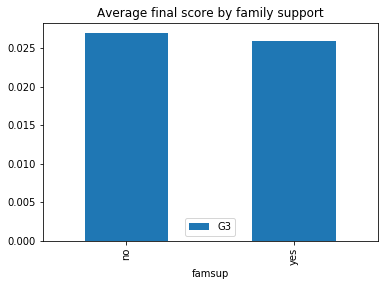

In [17]:
#Lets find the average final score by family support
plot_bar(df,"famsup","G3","Average final score by family support")

             G3
paid           
no     9.985981
yes   10.922652


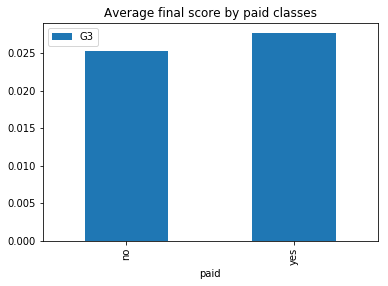

In [18]:
#Lets find the average final score by paid classes
plot_bar(df,"paid","G3","Average final score by paid classes")

            G3
higher        
no       6.800
yes     10.608


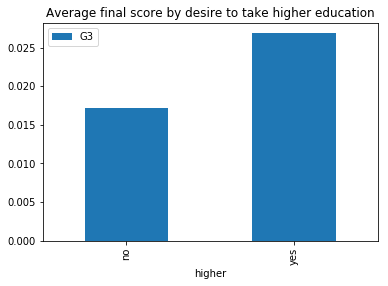

In [19]:
#Lets find the average final score by desire to take higher education
plot_bar(df,"higher","G3","Average final score by desire to take higher education")

                 G3
internet           
no         9.409091
yes       10.617021


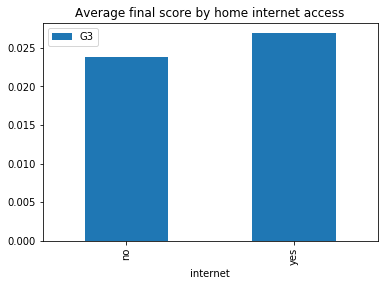

In [20]:
#Lets find the average final score by home internet access
plot_bar(df,"internet","G3","Average final score by home internet access")

                 G3
romantic           
no        10.836502
yes        9.575758


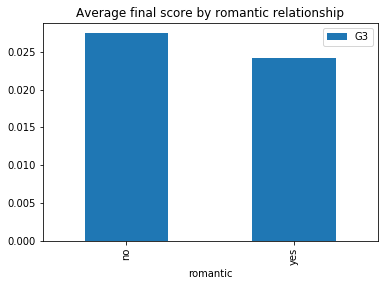

In [21]:
#Lets find the average final score by romantic relationship
plot_bar(df,"romantic","G3","Average final score by romantic relationship")

                G3
address           
R         9.511364
U        10.674267


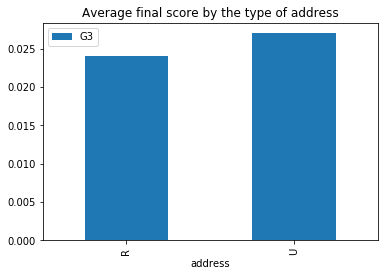

In [22]:
#Lets find the average final score by type of address
plot_bar(df,"address","G3","Average final score by the type of address")

              G3
goout           
1       9.869565
2      11.194175
3      10.961538
4       9.651163
5       9.037736


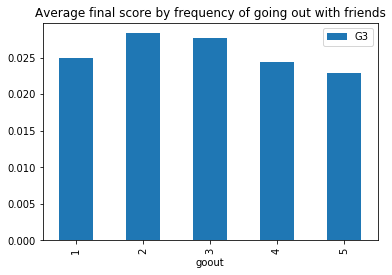

In [23]:
#Lets find the average final score by frequency of going out with friends
plot_bar(df,"goout","G3","Average final score by frequency of going out with friends")